In [25]:
!pip install nltk
!pip install imbalanced-learn

In [26]:
! pip install q wordcloud
import wordcloud
import nltk

In [27]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
import re
import string
import nltk

In [28]:
#Loading the data from csv file to pandas DataFrame
df=pd.read_csv("/content/mail_data.csv")

In [29]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [30]:
#printing first 5 rows of the DataFrame
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
#Replace a null value with a null string
md=df.where((pd.notnull(df)),'')

In [32]:
df.isnull().sum()

,0
Category,0
Message,0


In [33]:
#checking the number of rows and columns in the dataframe
print("Shape of dataset",df.shape)

Shape of dataset (5572, 2)


In [34]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [35]:
#Counting the labels
print('count of label:\n',df['Category'].value_counts())

count of label:
 Category
ham     4825
spam     747
Name: count, dtype: int64


spam-0

ham-1

In [36]:
#Ratio of spam and ham mails
print("Spam email ratio:",round(len(df[df['Category']=='spam'])/len(df['Category']),2)*100,"%")
print("ham email ratio :",round(len(df[df['Category']=='ham'])/len(df['Category']),2)*100,"%")

Spam email ratio: 13.0 %
ham email ratio : 87.0 %


In [37]:
#Length of the mesage
df['length']=df.Message.str.len()
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
#Converting message to lowercase string
df['Message']=df['Message'].str.lower()
df.head()

,Category,Message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [39]:
#remove numbers
df['Message']=df['Message'].apply(lambda x: re.sub(r'\d+', '',x))
#remove punctuations
df['Message']=df['Message'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
#remove leading and trailing whitespaces
df['Message']=df['Message'].apply(lambda x: re.sub(r'\s+', ' ',x).strip())

In [40]:
df.head(5)

,Category,Message,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in a wkly comp to win fa cup final ...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i dont think he goes to usf he lives aroun...,61


In [41]:
#remove stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
df['Message']=df["Message"].apply(lambda x: ' '.join(term for term in x.split() if term not in stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
#new column (clean length) after punctuations,stopwords removal
df['clean_length']=df['Message'].str.len()
df.head()

,Category,Message,length,clean_length
0,ham,go jurong point crazy available bugis n great ...,111,82
1,ham,ok lar joking wif u oni,29,23
2,spam,free entry wkly comp win fa cup final tkts st ...,155,107
3,ham,u dun say early hor u c already say,49,35
4,ham,nah dont think goes usf lives around though,61,43


In [43]:
#total length removal
print("Original length     :",df.length.sum())
print("Cleaned length      :",df.clean_length.sum())
print("Total words removed :",df.length.sum()-df.clean_length.sum())

Original length     : 447816
Cleaned length      : 285997
Total words removed : 161819


<ipython-input-44-8e6f2f1661ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Category'],palette='Reds')


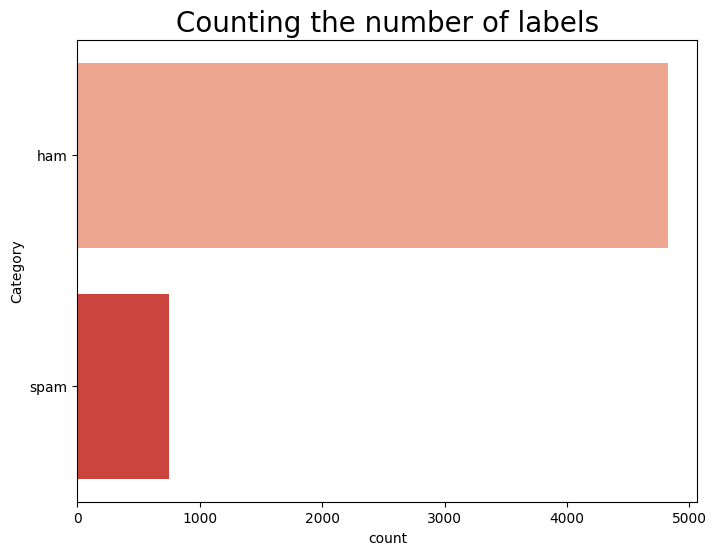

Category
ham     4825
spam     747
Name: count, dtype: int64


In [44]:
from tkinter import font
#graphical representation for counting number of labels
plt.figure(figsize=(8,6))
sns.countplot(df['Category'],palette='Reds')
plt.title('Counting the number of labels',fontsize=20)
plt.xticks(rotation='horizontal')
plt.show()
print(df.Category.value_counts())

<ipython-input-60-761182fc0c79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']=='spam']['clean_length'],bins=20,ax=ax[0],label='spam message distribution',color='r')
<ipython-input-60-761182fc0c79>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']=='ham']['cl

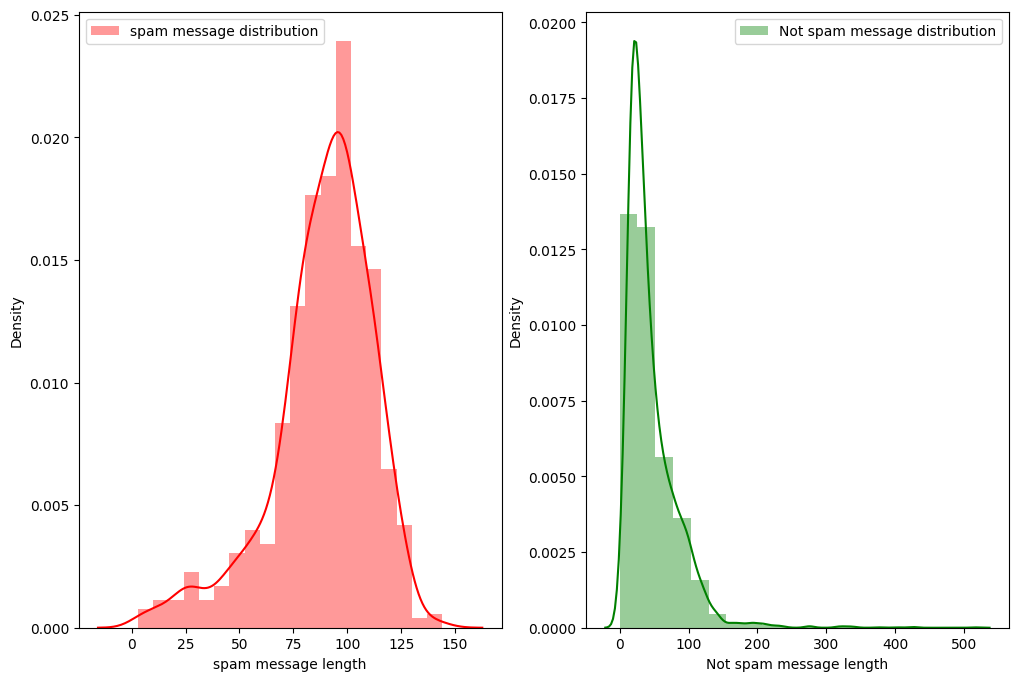

In [60]:

f, ax = plt.subplots(1,2,figsize=(12, 8))
sns.distplot(df[df['Category']=='spam']['clean_length'],bins=20,ax=ax[0],label='spam message distribution',color='r')
ax[0].set_xlabel('spam message length')
ax[0].legend()
sns.distplot(df[df['Category']=='ham']['clean_length'],bins=20,ax=ax[1],label='Not spam message distribution',color='g')
ax[1].set_xlabel('Not spam message length')
ax[1].legend()

plt.show()



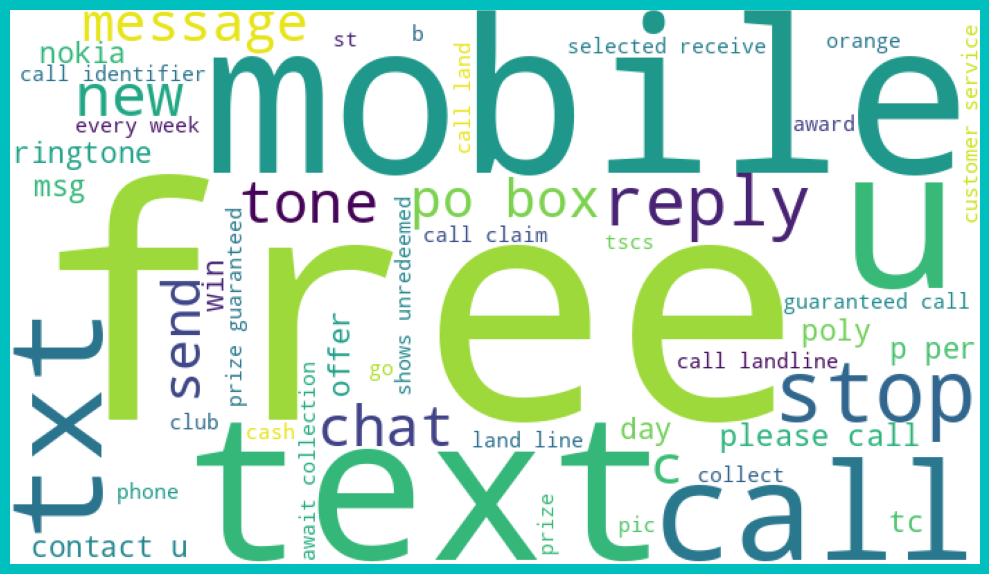

In [46]:
from wordcloud import WordCloud
spams=df['Message'][df['Category']=='spam']
spam_cloud=WordCloud(width=700,height=400,background_color='white',max_words=50).generate(''.join(spams))
plt.figure(figsize=(10,8),facecolor='c')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

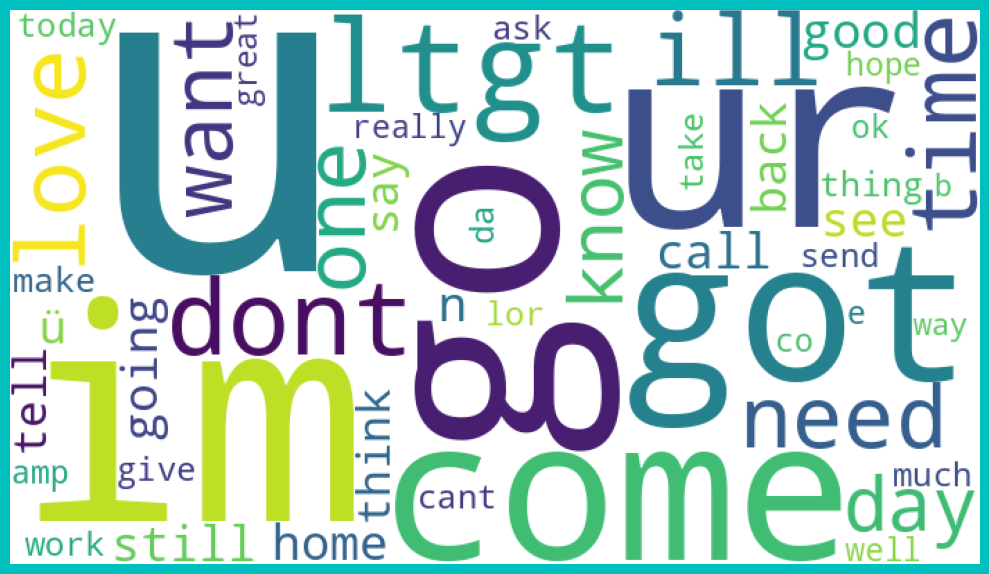

In [66]:
from wordcloud import WordCloud
hams=df['Message'][df['Category']=='ham']
ham_cloud=WordCloud(width=700,height=400,background_color='white',max_words=50).generate(''.join(hams))
plt.figure(figsize=(10,8),facecolor='c')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [71]:
#1. convert text into vectors using TF-IDF
#2. split feature and label
tf_vector=TfidfVectorizer()
SVM=SVC(C=1.0,kernel='linear',gamma='auto')
features=tf_vector.fit_transform(df['Message'])
X=features
y=df['Category']

In [68]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,random_state=42)
SVM.fit(X_train,Y_train)
y_pred=SVM.predict(x_test)

print('Accuracy score=> ',accuracy_score(y_test,y_pred))


Accuracy score=>  0.9813352476669059


In [69]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1207
        spam       0.98      0.88      0.93       186

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



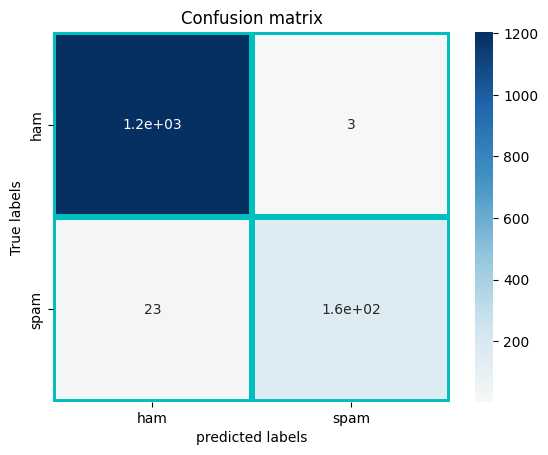

In [70]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(conf_mat,annot=True,ax=ax,linewidth=3,linecolor='c',cmap='RdBu',center=0)
ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

**USING SMOTE TECHNIQUE TO BALANCE THE IMBALANCE DATASET**

In [52]:
#Applying SMOTE to balance the Dataset
smote=SMOTE(sampling_strategy='auto',random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)
# check new class distribution
print("Class distribution after SMOTE:\n",pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
 Category
ham     4825
spam    4825
Name: count, dtype: int64


<ipython-input-53-de3de2f7060f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_resampled,palette='coolwarm')


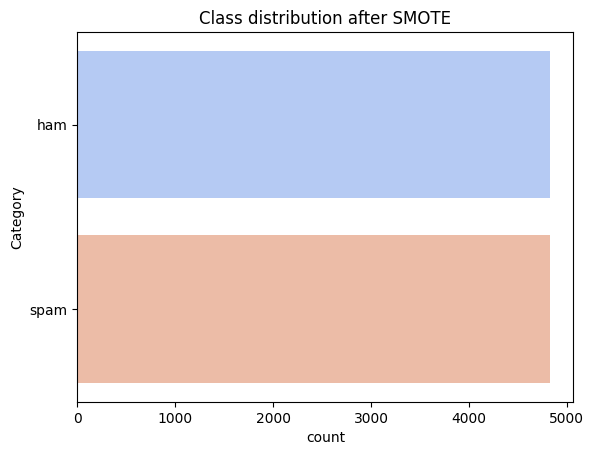

In [53]:
#Plot class distribution  after SMOTE
sns.countplot(y_resampled,palette='coolwarm')
plt.title('Class distribution after SMOTE')
plt.show()

**Training & Evaluating SVM Model(After  SMOTE)**

In [54]:
# Split the balanced dataset
X_train,x_test,Y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
# Train svm model
SVM=SVC(C=1.0,kernel='linear',gamma='auto')
SVM.fit(X_train,Y_train)
# Prediction
y_pred=SVM.predict(x_test)
# Calculate accuracy after SMOTE
accuracy_after_smote=accuracy_score(y_test,y_pred)
print('Accuracy after applying SMOTE =>',accuracy_after_smote)


Accuracy after applying SMOTE => 0.9968911917098445


In [55]:
# Classification report
print("Classification Report After SMOTE:\n",classification_report(y_test,y_pred))

Classification Report After SMOTE:
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00       990
        spam       1.00      1.00      1.00       940

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



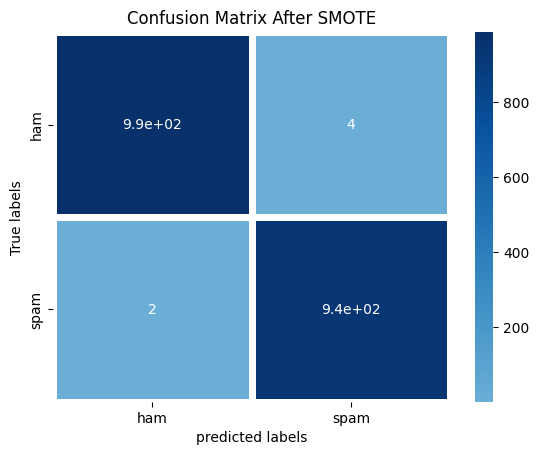

In [56]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(conf_mat,annot=True,ax=ax,linewidth=5,linecolor='w',cmap='Blues',center=0)
ax.set_xlabel('predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix After SMOTE')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [57]:
input_mail=["Sorry, I'll call later in meeting."]
#convert text to feature vectors
input_data_features=tf_vector.transform(input_mail)
#making prediction
prediction=SVM.predict(input_data_features)
print("This is a ",prediction,"message")

if (prediction[0]=="ham"):
  print('Ham mail')

else:
  print('Spam mail')

This is a  ['ham'] message
Ham mail


In [65]:
import pickle
pickle.dump(tf_vector,open('vectorizer.pkl','wb'))
pickle.dump(SVM,open('model.pkl','wb'))
